<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 6: параметрические тесты
</center>

**ФИО:** Галий Иван Николаевич

## Общая информация

__Дата выдачи:__ 23.04.2025

__Дедлайн:__ 23:59MSK 13.05.2025

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [2]:
df = pd.read_csv(r"D:\yp_down\dating_is_hard.csv")

__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

In [3]:
heights_m = df[df['sex']=='m']['height'].dropna()
heights_f = df[df['sex']=='f']['height'].dropna()

# гипотезы для мужчин:
#   H0: средний рост мужчин в приложении == 69.0
#   H1: средний рост мужчин в приложении != 69.0


t_m, p_m = sts.ttest_1samp(heights_m, 69.0)
print("Men: t =", t_m, ", p =", p_m)

# гипотезы для женщин:
#   H0: средний рост женщин в приложении == 63.5
#   H1: средний рост женщин в приложении != 63.5

t_f, p_f = sts.ttest_1samp(heights_f, 63.5)
print("Women: t =", t_f, ", p =", p_f)
# (⌒_⌒)

Men: t = 11.089040037689081 , p = 4.049306510002541e-26
Women: t = 9.8482732730527 , p = 1.2552189176957907e-20


__Вывод:__ Средний рост мужчин (p=4.05e-26) и женщин (p=1.26e-20) в приложении значимо отличается от реального

https://www.cdc.gov/nchs/fastats/body-measurements.htm

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [4]:
# Доли жестких пьяниц
p_m = df[df['sex']=='m']['is_heavy_drinker'].mean()
p_f = df[df['sex']=='f']['is_heavy_drinker'].mean()
n_m = df[df['sex']=='m'].shape[0]
n_f = df[df['sex']=='f'].shape[0]

# Гипотезы:
#   H0: p_men == p_women
#   H1: p_men >  p_women   (односторонняя)

# Объединённая пропорция
p_pool = (p_m * n_m + p_f * n_f) / (n_m + n_f)

# Z-статистика
z = (p_m - p_f) / np.sqrt(p_pool * (1 - p_pool) * (1/n_m + 1/n_f))

# Односторонний p-value
p_val_one_sided = 1 - sts.norm.cdf(z)

print(f"p_m = {p_m:.3f}, p_f = {p_f:.3f}")
print(f"Z = {z:.3f}, p (one-sided) = {p_val_one_sided:.3f}")
# (Д_Д)

p_m = 0.085, p_f = 0.077
Z = 0.423, p (one-sided) = 0.336


__Вывод:__ статистически значимой разницы нет, H0 не отвергаем.

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [5]:
smoke_if_drink = df[df['is_heavy_drinker'] == True]['smokes'].mean()
smoke_if_not   = df[df['is_heavy_drinker'] == False]['smokes'].mean()
n_drink = df[df['is_heavy_drinker'] == True].shape[0]
n_not   = df[df['is_heavy_drinker'] == False].shape[0]

# Гипотезы:
#   H0: p_smoke|drink == p_smoke|not
#   H1: p_smoke|drink >  p_smoke|not   (односторонняя)

# Объединённая пропорция
p_pool2 = (smoke_if_drink * n_drink + smoke_if_not * n_not) / (n_drink + n_not)

# Z-статистика
z2 = (smoke_if_drink - smoke_if_not) / np.sqrt(p_pool2 * (1 - p_pool2) * (1/n_drink + 1/n_not))

# Односторонний p-value
p_val2_one_sided = 1 - sts.norm.cdf(z2)

print(f"smoke_if_drink = {smoke_if_drink:.3f}, smoke_if_not = {smoke_if_not:.3f}")
print(f"Z = {z2:.3f}, p (one-sided) = {p_val2_one_sided:.3f}")
# (渋谷事変)

smoke_if_drink = 0.427, smoke_if_not = 0.389
Z = 0.674, p (one-sided) = 0.250


__Вывод:__ статистически значимой разницы нет, H0 не отвергаем.

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**



Упростить форму бронирования: после получения выдачи вариантов отелей, добавить две кнопки "подробнее" и сразу "забронировать" по одной кнопке переходить на страницу оплаты, а по другой на страницу отеля

Увеличить размер и контрастность кнопки "Забронировать".

Добавить блок с ограниченными предложениями ("Осталось 2 номера!").



Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [6]:
df = pd.read_csv(r"D:\yp_down\ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

Test group: 50.26%
Control group: 49.74%

Южный федеральный округ: control=20.00%, test=40.00%
Центральный федеральный округ: control=40.00%, test=20.00%
Северо-Западный федеральный округ: control=20.00%, test=5.00%
Приволжский федеральный округ: control=12.00%, test=18.00%
Уральский федеральный округ: control=3.00%, test=10.00%
Сибирский федеральный округ: control=4.00%, test=4.00%
Дальневосточный федеральный округ: control=1.00%, test=3.00%



Даты теста: 2023-11-01 01:01:00 — 2024-05-02 23:58:00


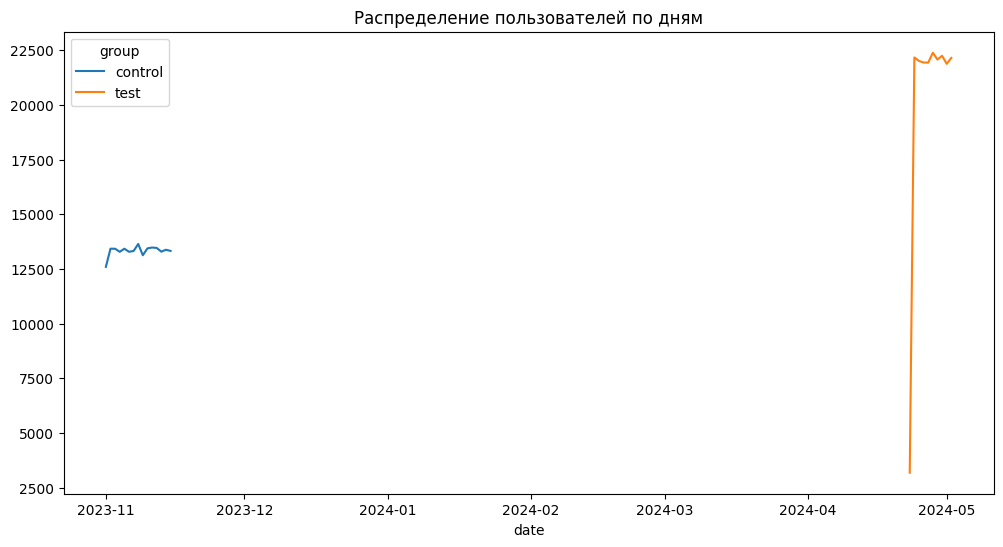

Конверсия control: 25.02%
Конверсия test: 33.39%


In [7]:
# Распределение групп 
group_counts = df['group'].value_counts()
total_users = len(df)
print(f"Test group: {group_counts['test'] / total_users:.2%}")
print(f"Control group: {group_counts['control'] / total_users:.2%}\n")

#аспределение регионов по группам
for district in df['district'].unique():
    control_ratio = len(df[(df['district'] == district) & (df['group'] == 'control')]) / group_counts['control']
    test_ratio = len(df[(df['district'] == district) & (df['group'] == 'test')]) / group_counts['test']
    print(f"{district}: control={control_ratio:.2%}, test={test_ratio:.2%}")
print("\n")

# Временной аналз
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %I:%M %p')
print("\nДаты теста:", df['datetime'].min(), "—", df['datetime'].max())
df['date'] = df['datetime'].dt.date
daily_users = df.groupby(['date', 'group']).size().unstack()
daily_users.plot(title='Распределение пользователей по дням', figsize=(12,6))
plt.show()

# Конверсия в оплату 
control_payment = df[df['group'] == 'control']['payment'].sum() / group_counts['control']
test_payment = df[df['group'] == 'test']['payment'].sum() / group_counts['test']
print(f"Конверсия control: {control_payment:.2%}")
print(f"Конверсия test: {test_payment:.2%}")

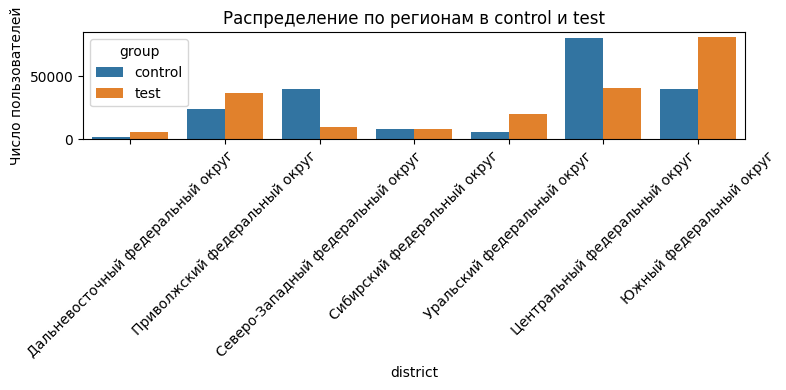

In [8]:
region_counts = df.groupby(['group','district']).size().reset_index(name='count')

plt.figure(figsize=(8,4))
sns.barplot(data=region_counts, x='district', y='count', hue='group')
plt.title("Распределение по регионам в control и test")
plt.ylabel("Число пользователей")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выводы из EDA:

Группы несбалансированы по регионам (например, Южный округ: 40% в test vs 20% в control).

Тест проводился в разные периоды (control — ноябрь-декабрь 2023, test — апрель-май 2024).

Конверсия в test выше (33.39% vs 25.02%), но разница ненадежна из-за ошибок в дизайне.

Ошибки A/B теста:

Нарушена рандомизация (группы различаются по регионам и времени).

Влияние сезонности (разные месяцы теста).

Региональные предпочтения искажают результаты.

Итог: Тест проведен некорректно. Разница в конверсии может быть вызвана внешними факторами, а не изменениями интерфейса.



Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [9]:
# Конверсия в payment_page и payment по регионам и группам
conv_matrix = df.pivot_table(
    index='district', 
    columns='group', 
    values=['payment_page', 'payment'], 
    aggfunc='mean'
)
print(conv_matrix)
# ┌(ಠ_ಠ)┘

                                    payment           payment_page          
group                               control      test      control      test
district                                                                    
Дальневосточный федеральный округ  0.232116  0.334764     0.100050  0.200066
Приволжский федеральный округ      0.252074  0.334516     0.600000  0.649994
Северо-Западный федеральный округ  0.251739  0.332079     0.700005  0.720016
Сибирский федеральный округ        0.246310  0.330280     0.299975  0.320005
Уральский федеральный округ        0.241161  0.330114     0.399933  0.450007
Центральный федеральный округ      0.250772  0.331220     0.899999  0.930002
Южный федеральный округ            0.249281  0.336395     0.800000  0.810001


Во всех регионах конверсия в оплату (payment) выше в тестовой группе

Конверсия в страницу оплаты (payment_page) также выше в тестовой группе, но менее значительно.

Региональная адаптация, вероятно, повысила доверие пользователей и мотивацию к оплате.

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [10]:
# Общая конверсия в payment_page и payment
conv_total = df.groupby('group')[['payment_page', 'payment']].mean()
print(conv_total)
# =^･ｪ･^=

         payment_page   payment
group                          
control      0.756999  0.250170
test         0.726803  0.333885


Конверсия в страницу оплаты ниже в тестовой группе (72.7% vs 75.7%), но:

Конверсия в успешную оплату значительно выше (33.4% vs 25.0%).

Главный результат: Пользователи тестовой группы реже переходили на страницу оплаты, но чаще завершали оплату. Это может указывать на:

Более релевантный трафик (пользователи лучше понимали предложение).

Упрощение процесса оплаты на этапе страницы отеля.



__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [11]:
# Распределение регионов в группах
region_dist = df.groupby(['group', 'district']).size().unstack()
print(region_dist / region_dist.sum(axis=1).values.reshape(-1,1))
# (⊙_⊙)

district  Дальневосточный федеральный округ  Приволжский федеральный округ  \
group                                                                        
control                            0.010001                       0.120002   
test                               0.030000                       0.179999   

district  Северо-Западный федеральный округ  Сибирский федеральный округ  \
group                                                                      
control                            0.199998                     0.039996   
test                               0.050001                     0.040003   

district  Уральский федеральный округ  Центральный федеральный округ  \
group                                                                  
control                      0.029999                       0.400001   
test                         0.099998                       0.200000   

district  Южный федеральный округ  
group                              
control              

Контрольная группа: Доминируют Центральный (40%) и Северо-Западный (20%) округа.

Тестовая группа: Преобладают Южный (40%) и Приволжский (18%) округа.

Сдвиг интересов:

В тестовой группе доля Южного округа выросла в 2 раза (20% → 40%), Центрального — упала в 2 раза (40% → 20%).

Уральский округ: рост с 3% до 10%.


Итог: Распределение регионов в группах неравномерно, что связано с дизайном эксперимента (региональная адаптация страниц). Это нарушает условия корректного A/B-теста.



Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** Парадокс возник из-за несбалансированности групп по регионам. Тестовая группа искусственно получила преимущество за счет смещения выборки, а не за счет улучшений продукта. Это классический пример, когда игнорирование стратификации приводит к ложным выводам.

## Задача №3: Не подглядывать! (50 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [12]:
# Подсчет размера выборки для А/Б-теста

alpha = 0.05
beta = 0.2
sigma_A = 40
sigma_B = 20
MDE = 5
daily_users = 200  

# Z-значен
z_alpha = sts.norm.ppf(1 - alpha/2)  
z_beta = sts.norm.ppf(1 - beta)      

# Расчет на одну группу
n_per_group = ((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2) / (MDE**2)
n_per_group = int(np.ceil(n_per_group)) 

# всего пользователей (для двух групп) и дней
total_users = 2 * n_per_group
total_days = int(np.ceil(total_users / daily_users))  

print(f"Размер выборки на группу: {n_per_group}")
print(f"Всего пользователей: {total_users}")
print(f"Дней тестирования: {total_days}")
# (♡-_-♡) 

Размер выборки на группу: 628
Всего пользователей: 1256
Дней тестирования: 7


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [13]:
# Функция генерации данных за день
def generate_daily_data(mu_A, mu_B, sigma_A, sigma_B, users_per_day):
    return {
        'A': np.random.normal(mu_A, sigma_A, users_per_day//2),
        'B': np.random.normal(mu_B, sigma_B, users_per_day//2)
    }

# Функция симуляции теста
def simulate_ab_test(days, mu_A, mu_B, sigma_A, sigma_B, users_per_day):
    data = []
    cum_A, cum_B = [], []
    
    for day in range(1, days+1):
        daily = generate_daily_data(mu_A, mu_B, sigma_A, sigma_B, users_per_day)
        cum_A.extend(daily['A'])
        cum_B.extend(daily['B'])
        
        # Расчет статистик
        mean_A = np.mean(cum_A)
        mean_B = np.mean(cum_B)
        _, p_val = sts.ttest_ind(cum_A, cum_B, equal_var=False)
        
        data.append({'day': day, 'mean_A': mean_A, 'mean_B': mean_B, 'p_value': p_val})
    
    return pd.DataFrame(data)

# Запуск симуляции для 50 дней
df = simulate_ab_test(50, 100, 105, 40, 20, 200)
# (´｡• ᵕ •｡`) 

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

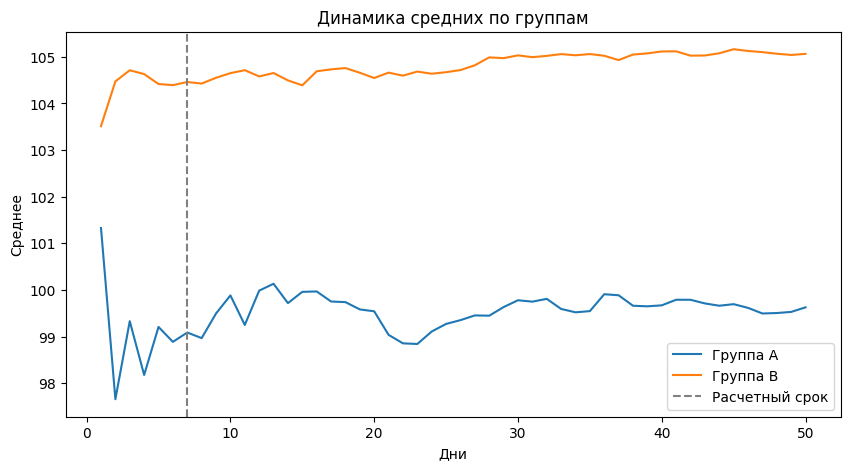

In [14]:
# График средних значений
plt.figure(figsize=(10,5))
plt.plot(df['day'], df['mean_A'], label='Группа A')
plt.plot(df['day'], df['mean_B'], label='Группа B')
plt.axvline(total_days, ls='--', color='grey', label='Расчетный срок')
plt.xlabel('Дни')
plt.ylabel('Среднее')
plt.legend()
plt.title('Динамика средних по группам')
plt.show()
# (´｡• ᵕ •｡`) 

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

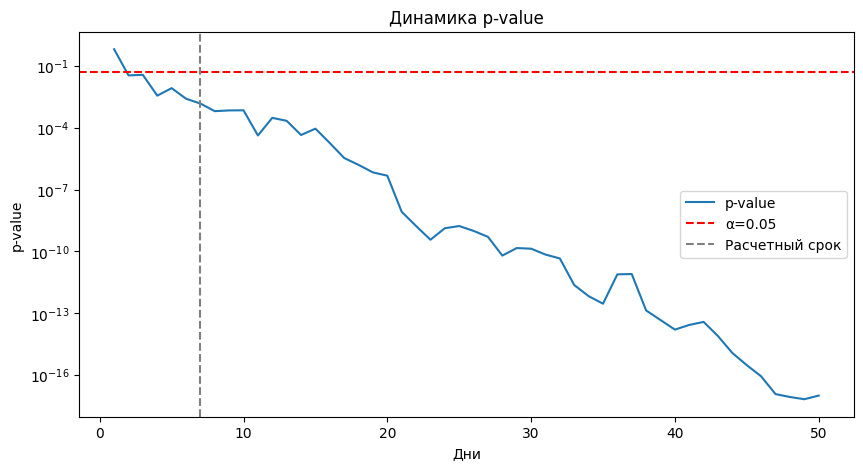

In [15]:
# График p-value
plt.figure(figsize=(10,5))
plt.plot(df['day'], df['p_value'], label='p-value')
plt.axhline(0.05, color='red', ls='--', label='α=0.05')
plt.axvline(total_days, ls='--', color='grey', label='Расчетный срок')
plt.yscale('log')
plt.xlabel('Дни')
plt.ylabel('p-value')
plt.legend()
plt.title('Динамика p-value')
plt.show()
# (´｡• ᵕ •｡`) 

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

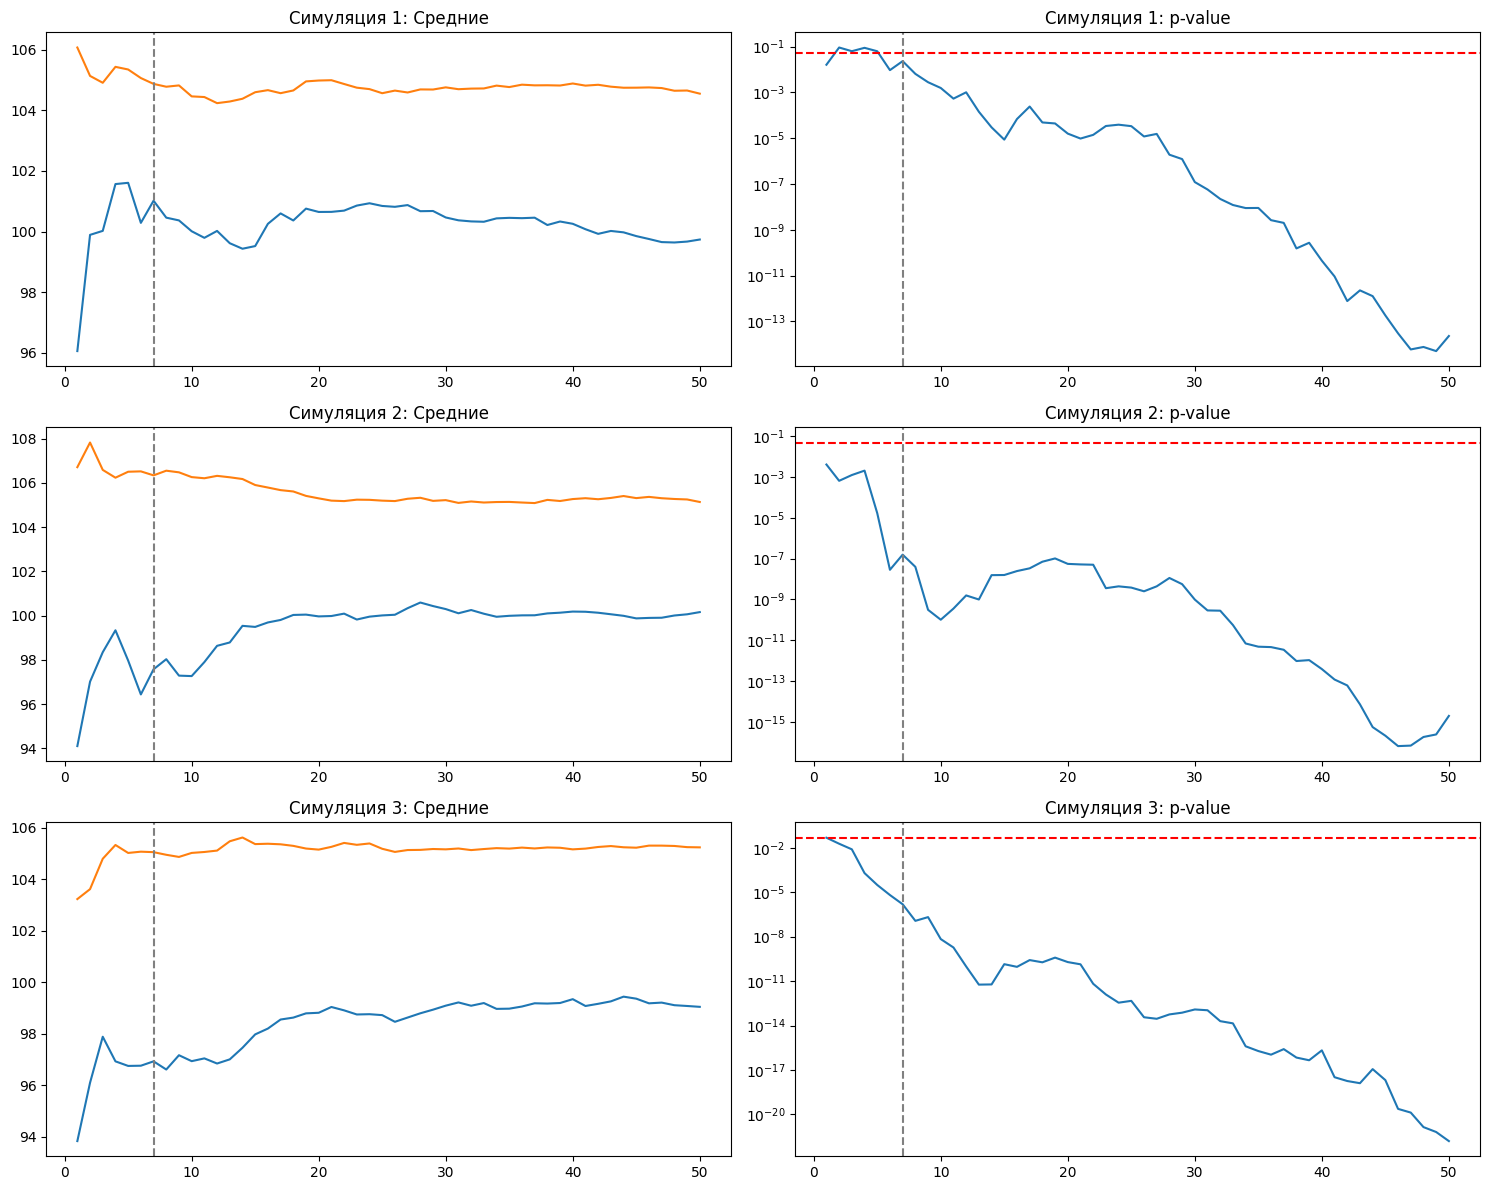

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i in range(3):
    df = simulate_ab_test(50, 100, 105, 40, 20, 200)
    
    # График средних
    axes[i, 0].plot(df['day'], df['mean_A'], label='Группа A')
    axes[i, 0].plot(df['day'], df['mean_B'], label='Группа B')
    axes[i, 0].axvline(total_days, ls='--', color='grey')
    axes[i, 0].set_title(f'Симуляция {i+1}: Средние')
    
    # График p-value
    axes[i, 1].plot(df['day'], df['p_value'])
    axes[i, 1].axhline(0.05, color='red', ls='--')
    axes[i, 1].axvline(total_days, ls='--', color='grey')
    axes[i, 1].set_yscale('log')
    axes[i, 1].set_title(f'Симуляция {i+1}: p-value')

plt.tight_layout()
plt.show()
# (◕‿◕)♡

Выводы по динамике p‑value и средних:

До расчётного срока (дни 1…N–1). На этих этапах p‑value очень нестабилен — часто пересекает порог a=0.05 просто из‑за случайного шума, хотя реальный эффект ещё не накопился.

В день расчётного срока (день N). Именно здесь мы официально фиксируем результат. p‑value на этот момент отражает накопленные за весь период данные и позволяет корректно принимать решение при контроле ошибки первого рода на уровне a.

После расчётного срока (дни N+1…). Если эффект есть (u_A!=u_B), p‑value будет стремиться к нулю, демонстрируя растущую статистическую значимость. 

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

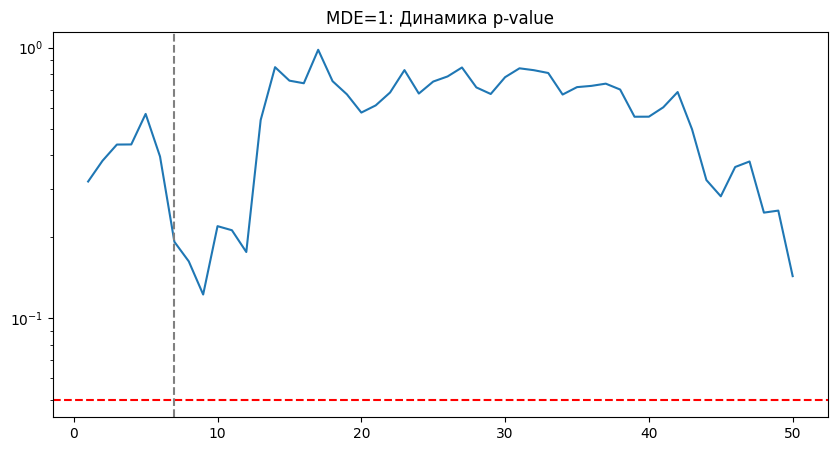

In [17]:
# Симуляция для MDE=1
df_mde1 = simulate_ab_test(50, 100, 101, 40, 20, 200)

# График p-value для MDE=1
plt.figure(figsize=(10,5))
plt.plot(df_mde1['day'], df_mde1['p_value'])
plt.axhline(0.05, color='red', ls='--')
plt.axvline(total_days, ls='--', color='grey')
plt.yscale('log')
plt.title('MDE=1: Динамика p-value')
plt.show()

# ♡ (´｡• ω •｡`) ♡

При MDE=1 p-value редко достигает значимости из-за малого эффекта.

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

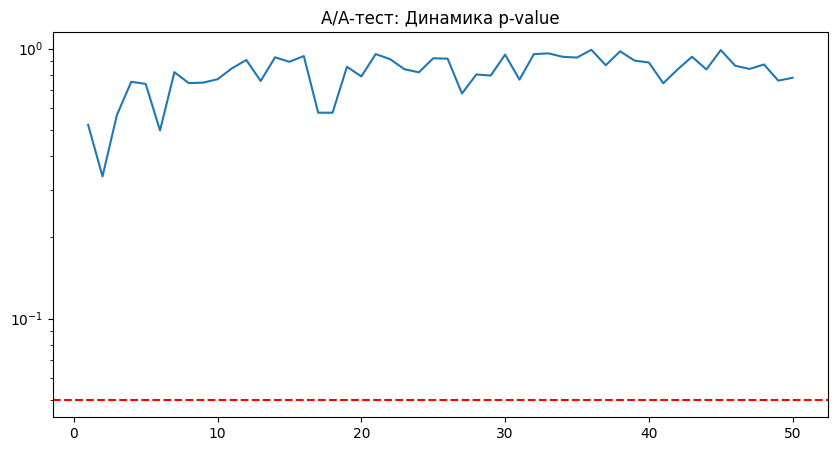

In [18]:
# A/A-тест (без эффекта)
df_aa = simulate_ab_test(50, 100, 100, 40, 40, 200)

# График p-value
plt.figure(figsize=(10,5))
plt.plot(df_aa['day'], df_aa['p_value'])
plt.axhline(0.05, color='red', ls='--')
plt.yscale('log')
plt.title('A/A-тест: Динамика p-value')
plt.show()

# =^･ｪ･^=

p-value может случайно опускаться ниже 0.05 (ложные срабатывания).

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

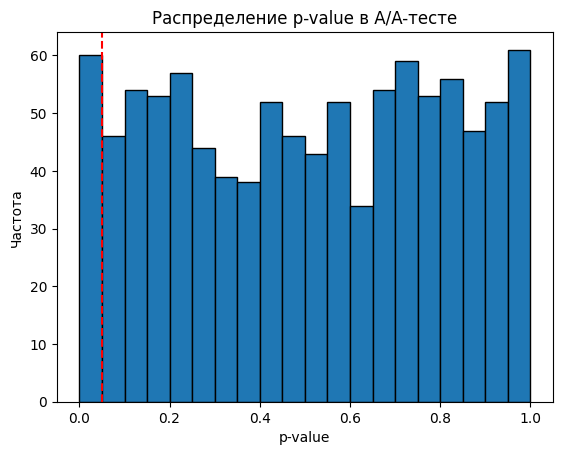

In [19]:
# Генерация 1000 p-value для A/A-теста
def generate_aa_pvalue():
    data = simulate_ab_test(total_days, 100, 100, 40, 40, 200)
    return data['p_value'].iloc[-1]

p_values = [generate_aa_pvalue() for _ in range(1000)]

# Гистограмма
plt.hist(p_values, bins=20, edgecolor='black')
plt.axvline(0.05, color='red', ls='--')
plt.xlabel('p-value')
plt.ylabel('Частота')
plt.title('Распределение p-value в A/A-тесте')
plt.show()

# C (・_・)ノ

Распределение равномерное: ~5% значений < 0.05 (соответствует a).